<a href="https://colab.research.google.com/github/SANGRAMLEMBE/Deep-Learning-for-Healthcare-Image-Analysis-Nvidia-Certificate-/blob/main/ImageIotut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ImageIO for reading DICOM images**

In [ ]:
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import imageio

Connect to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Reading DICOM Image

In [ ]:
im = imageio.imread('/content/drive/MyDrive/dicomsample/000055.dcm')

/tmp/ipython-input-2620814761.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('/content/drive/MyDrive/dicomsample/000055.dcm')


DICOM Metadata Ref: https://towardsdatascience.com/dealing-with-dicom-using-imageio-python-package-117f1212ab82

In [ ]:
#DICOM Metadata
im.meta

Dict([('TransferSyntaxUID', '1.2.840.10008.1.2.1'),
      ('SOPClassUID', '1.2.840.10008.5.1.4.1.1.2'),
      ('SOPInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.7085.2626.174612129044952622307175909997'),
      ('StudyDate', '20100227'),
      ('SeriesDate', '20100227'),
      ('AcquisitionDate', '20100227'),
      ('ContentDate', '20100227'),
      ('StudyTime', '161937.171'),
      ('SeriesTime', '162536.14 '),
      ('AcquisitionTime', '162205.318447 '),
      ('ContentTime', '162205.318447 '),
      ('Modality', 'CT'),
      ('Manufacturer', 'SIEMENS'),
      ('StudyDescription', 'CT CHEST W IV CONTRAST'),
      ('SeriesDescription', 'LUNG 3.0  B70f'),
      ('PatientName', 'C3N-00247'),
      ('PatientID', 'C3N-00247'),
      ('PatientBirthDate', ''),
      ('PatientSex', 'F '),
      ('PatientAge', '077Y'),
      ('StudyInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.7085.2626.258626612405225511766549337110'),
      ('SeriesInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.7085.2626.24

In [ ]:
# Access the Pixel Data attribute
im.meta['PixelData']

b'Data converted to numpy array, raw data removed to preserve memory'

In [ ]:
#print the image Numpy-array
im

Array([[ -901,  -904,  -941, ...,  -775,  -870,  -884],
       [ -834,  -749,  -807, ...,  -880,  -962,  -897],
       [ -751,  -729,  -727, ...,  -962,  -922,  -842],
       ...,
       [ -939,  -942,  -878, ...,  -902,  -878, -1011],
       [ -942,  -913,  -885, ...,  -871,  -816,  -975],
       [ -942,  -883,  -895, ...,  -877,  -858,  -973]], dtype=int16)

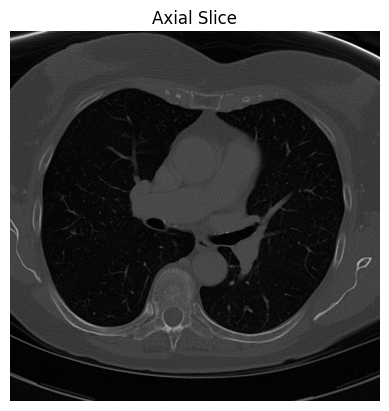

In [ ]:
#Show the image with gray color-map
plt.imshow(im, cmap='gray')
#Don't show tha axes
plt.axis('off')
#Add a title to the plot
plt.title('Axial Slice')
plt.show()

https://www.kaggle.com/datasets/dmisky/dlwptvolumetricdicomlung/code Ref: Dataset.  #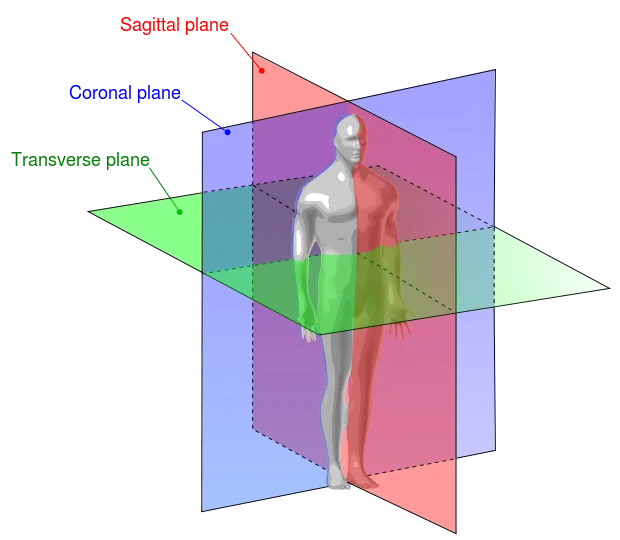

In [ ]:
vol = imageio.volread('/content/drive/MyDrive/dicomsample/000065.dcm')

Reading DICOM (examining files): 1/100 files (1.0%)2/100 files (2.0%)3/100 files (3.0%)4/100 files (4.0%)30/100 files (30.0%)55/100 files (55.0%)85/100 files (85.0%)  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.4.90' (JPEG 2000). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 85/100 files (85.0%)100/100 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 11/99  (11.1%)29/99  (29.3%)51/99  (51.5%)73/99  (73.7%)75/99  (75.8%)88/99  (88.9%)99/99  (100.0%)


In [ ]:
# The shape of the stacked images in each plane
# (Axial, Coronal, and Sagittal, respectively)
n0, n1, n2 = vol.shape
# Print the ouput
print("Number of Slices:\n\t", "Axial=", n0, "Slices\n\t",
                               "Coronal=", n1, "Slices\n\t",
                               "Sagittal=", n2, "Slices")

Number of Slices:
	 Axial= 99 Slices
	 Coronal= 512 Slices
	 Sagittal= 512 Slices


In [ ]:
# The sampling of the stacked images in each plane
# (Axial, Coronal, and Sagittal, respectively)
d0, d1, d2 = vol.meta['sampling'] # in mm
# Print the output
print("Sampling:\n\t", "Axial=", d0, "mm\n\t",
                               "Coronal=", d1, "mm\n\t",
                               "Sagittal=", d2, "mm")

Sampling:
	 Axial= 3.0 mm
	 Coronal= 0.564453125 mm
	 Sagittal= 0.564453125 mm


In [ ]:
# The aspect ratio along the axial plane
axial_asp = d1/d2
# The aspect ratio along the sagittal plane
sagittal_asp = d0/d1
# The aspect ratio along the coronal plane
coronal_asp = d0/d2
# Print the output
print("Pixel Aspect Ratio:\n\t", "Axial=", axial_asp, "\n\t",
                               "Coronal=", coronal_asp, "\n\t",
                               "Sagittal=", sagittal_asp)

Pixel Aspect Ratio:
	 Axial= 1.0 
	 Coronal= 5.314878892733564 
	 Sagittal= 5.314878892733564


#Viewing Slices

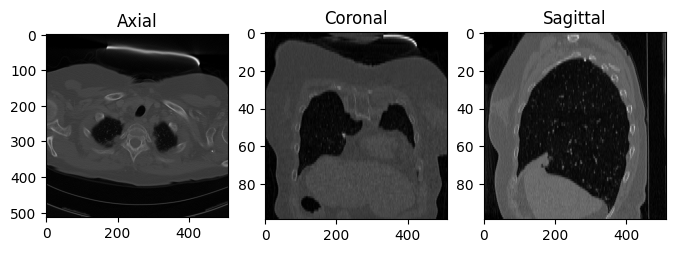

In [ ]:
# Define a figure with 1 row and 3 columns of plots to show
# the images along the three planes
fig, ax = plt.subplots(1, 3, figsize=(8, 8))
# Axial Plane: show the 10th slice
ax[0].imshow(vol[10,:,:], cmap='gray', aspect= axial_asp)
#ax[0].axis('off')
ax[0].set_title('Axial')

# Coronal Plane: show the slice 100
ax[1].imshow(vol[:,100,:],cmap='gray', aspect= coronal_asp)
#ax[1].axis('off')
ax[1].set_title('Coronal')

# Sagittal Plane: show the slice 100
ax[2].imshow(vol[:,:,100], cmap='gray', aspect= sagittal_asp)
#ax[2].axis('off')
ax[2].set_title('Sagittal')
plt.show()

In [ ]:
# Add a slider that starts with 0 and ends at the number of
# slices along the axial plane, n0=99.
@widgets.interact(axial_slice=(0,n0-1))
# Define the function that shows the images of the specified slice number.
# It starts with the 10th slice. And you can scroll over any slice
# using the slider.
def axial_slicer(axial_slice=50):
  fig, ax = plt.subplots(1, 1, figsize=(8, 8))
  # Show the image of the specified slice number in 'gray' color-map
  # and axial aspect ratio
  ax.imshow(vol[axial_slice,:,:], cmap='gray', aspect=axial_asp)
  # Don't show the axis
  ax.axis('off')

interactive(children=(IntSlider(value=50, description='axial_slice', max=98), Output()), _dom_classes=('widget…

In [ ]:
# Add three sliders that start with 0 and ends at the number of slices
# along each plane.
# Axial:    n0=99   slice
# Corornal: n1=512  slice
# Sagittal: n2=512  slice
@widgets.interact(axial_slice=(0,n0-1), coronal_slice=(0,n1-1),\
                  sagittal_slice=(0,n2-1))
def slicer(axial_slice, coronal_slice, sagittal_slice=100):
  fig, ax = plt.subplots(1, 3, figsize=(12, 12))

  # Show the specfied slice on the axial plane with 'gray' color-map
  # and axial aspect ratio.
  ax[0].imshow(vol[axial_slice,:,:], cmap='gray', aspect= axial_asp)
  ax[0].axis('off')
  ax[0].set_title('Axial')

  # Show the specified slice on the coronal plane with 'gray' color-map
  # and coronal aspect ratio.
  ax[1].imshow(vol[:,coronal_slice,:],cmap='gray', aspect= coronal_asp)
  ax[1].axis('off')
  ax[1].set_title('Coronal')

  # Show the specified slice on the sagittal plane with 'gray' color-map
  # and sagittal aspect ratio.
  ax[2].imshow(vol[:,:,sagittal_slice], cmap='gray', aspect= sagittal_asp)
  ax[2].axis('off')
  ax[2].set_title('Sagittal')



interactive(children=(IntSlider(value=49, description='axial_slice', max=98), IntSlider(value=255, description…